In [ ]:
!nvidia-smi

Sat Aug 31 17:40:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 22.5 MB/s eta 0:00:00


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

#!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Object Detection

/content/drive/.shortcut-targets-by-id/1iWGZQifwCOQPmXfhM2mycfHIjbGO_0fJ/Object Detection


In [ ]:
!ls

 data.yaml			 yolov8n.pt
 dog.jpeg			 Yolov8_object_detection_on_custom_dataset.ipynb
'Friends Detection.v1i.yolov8'	 yolov8s.pt
 runs				 yolov8x.pt
 YOLO_v8_CMD.ipynb


In [ ]:
!pip install --upgrade ultralytics

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Object Detection
!yolo task=detect mode=train model=yolov8x.pt data= data.yaml epochs=150 imgsz=640 plots=True

/content/drive/.shortcut-targets-by-id/1iWGZQifwCOQPmXfhM2mycfHIjbGO_0fJ/Object Detection
Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [11]:
!ls runs/detect/train3/

args.yaml					    P_curve.png       train_batch280.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch281.jpg
confusion_matrix.png				    R_curve.png       train_batch282.jpg
events.out.tfevents.1725126430.539a0a1502ed.2390.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


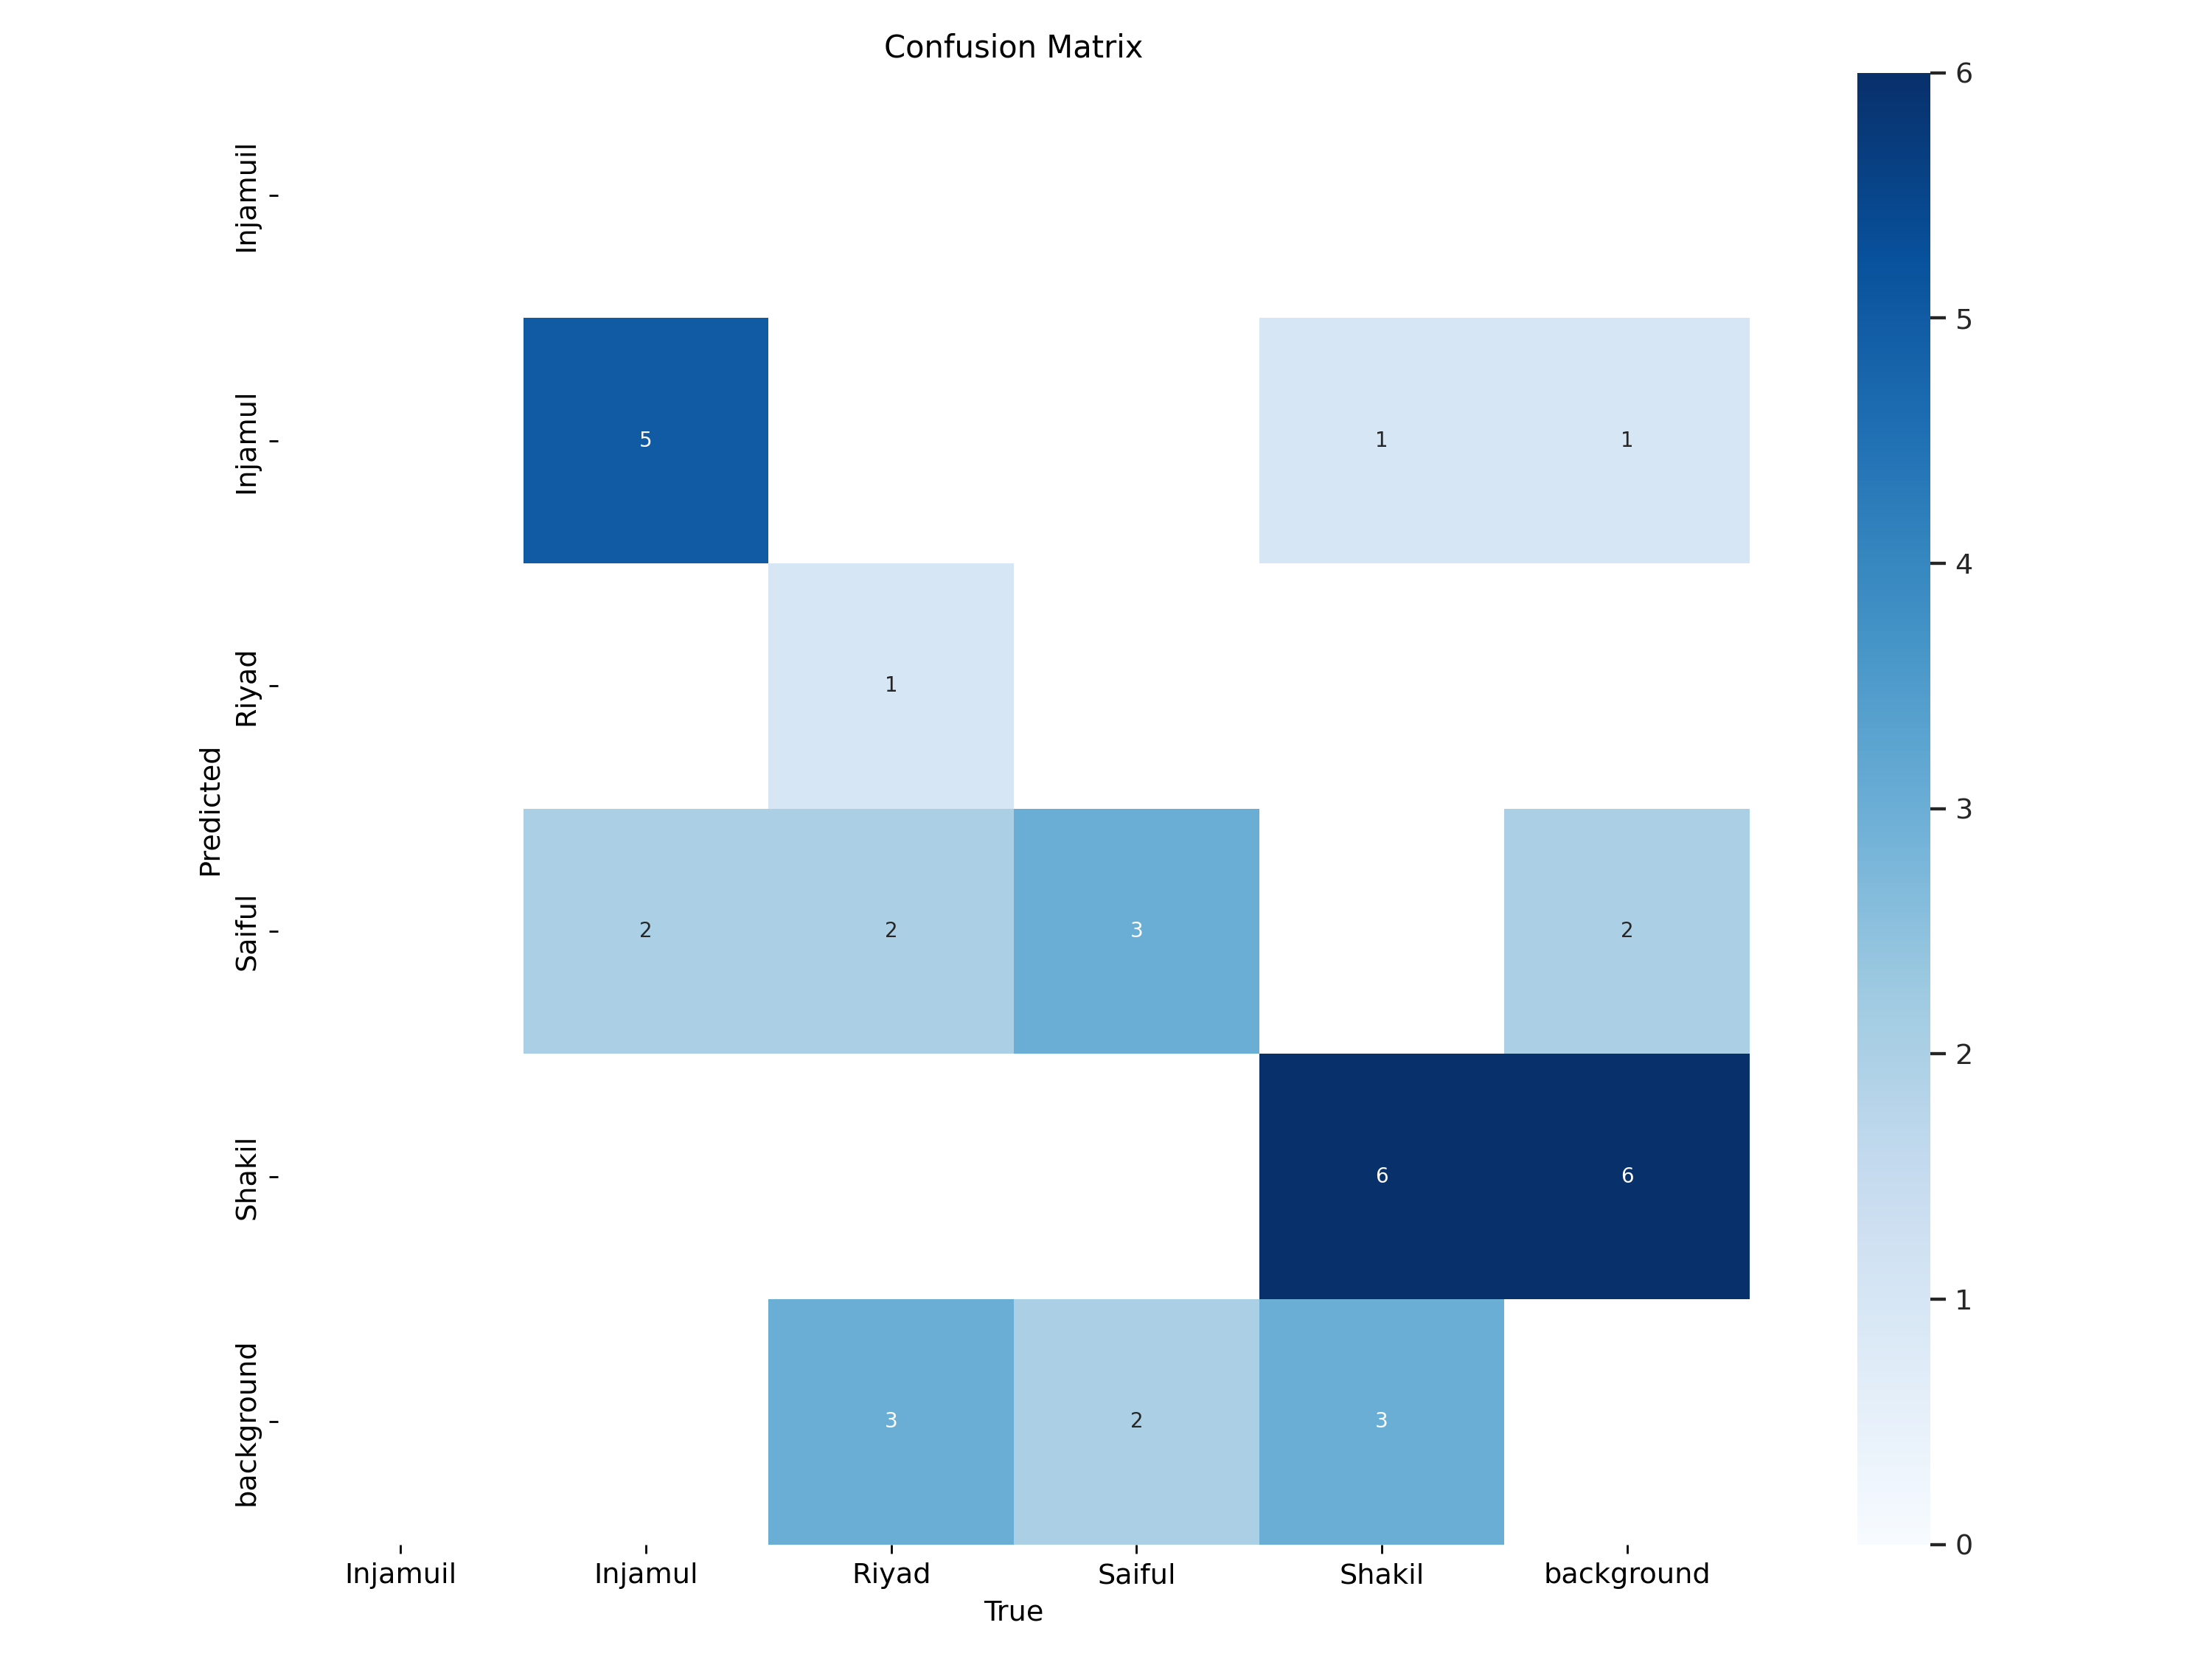

In [12]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

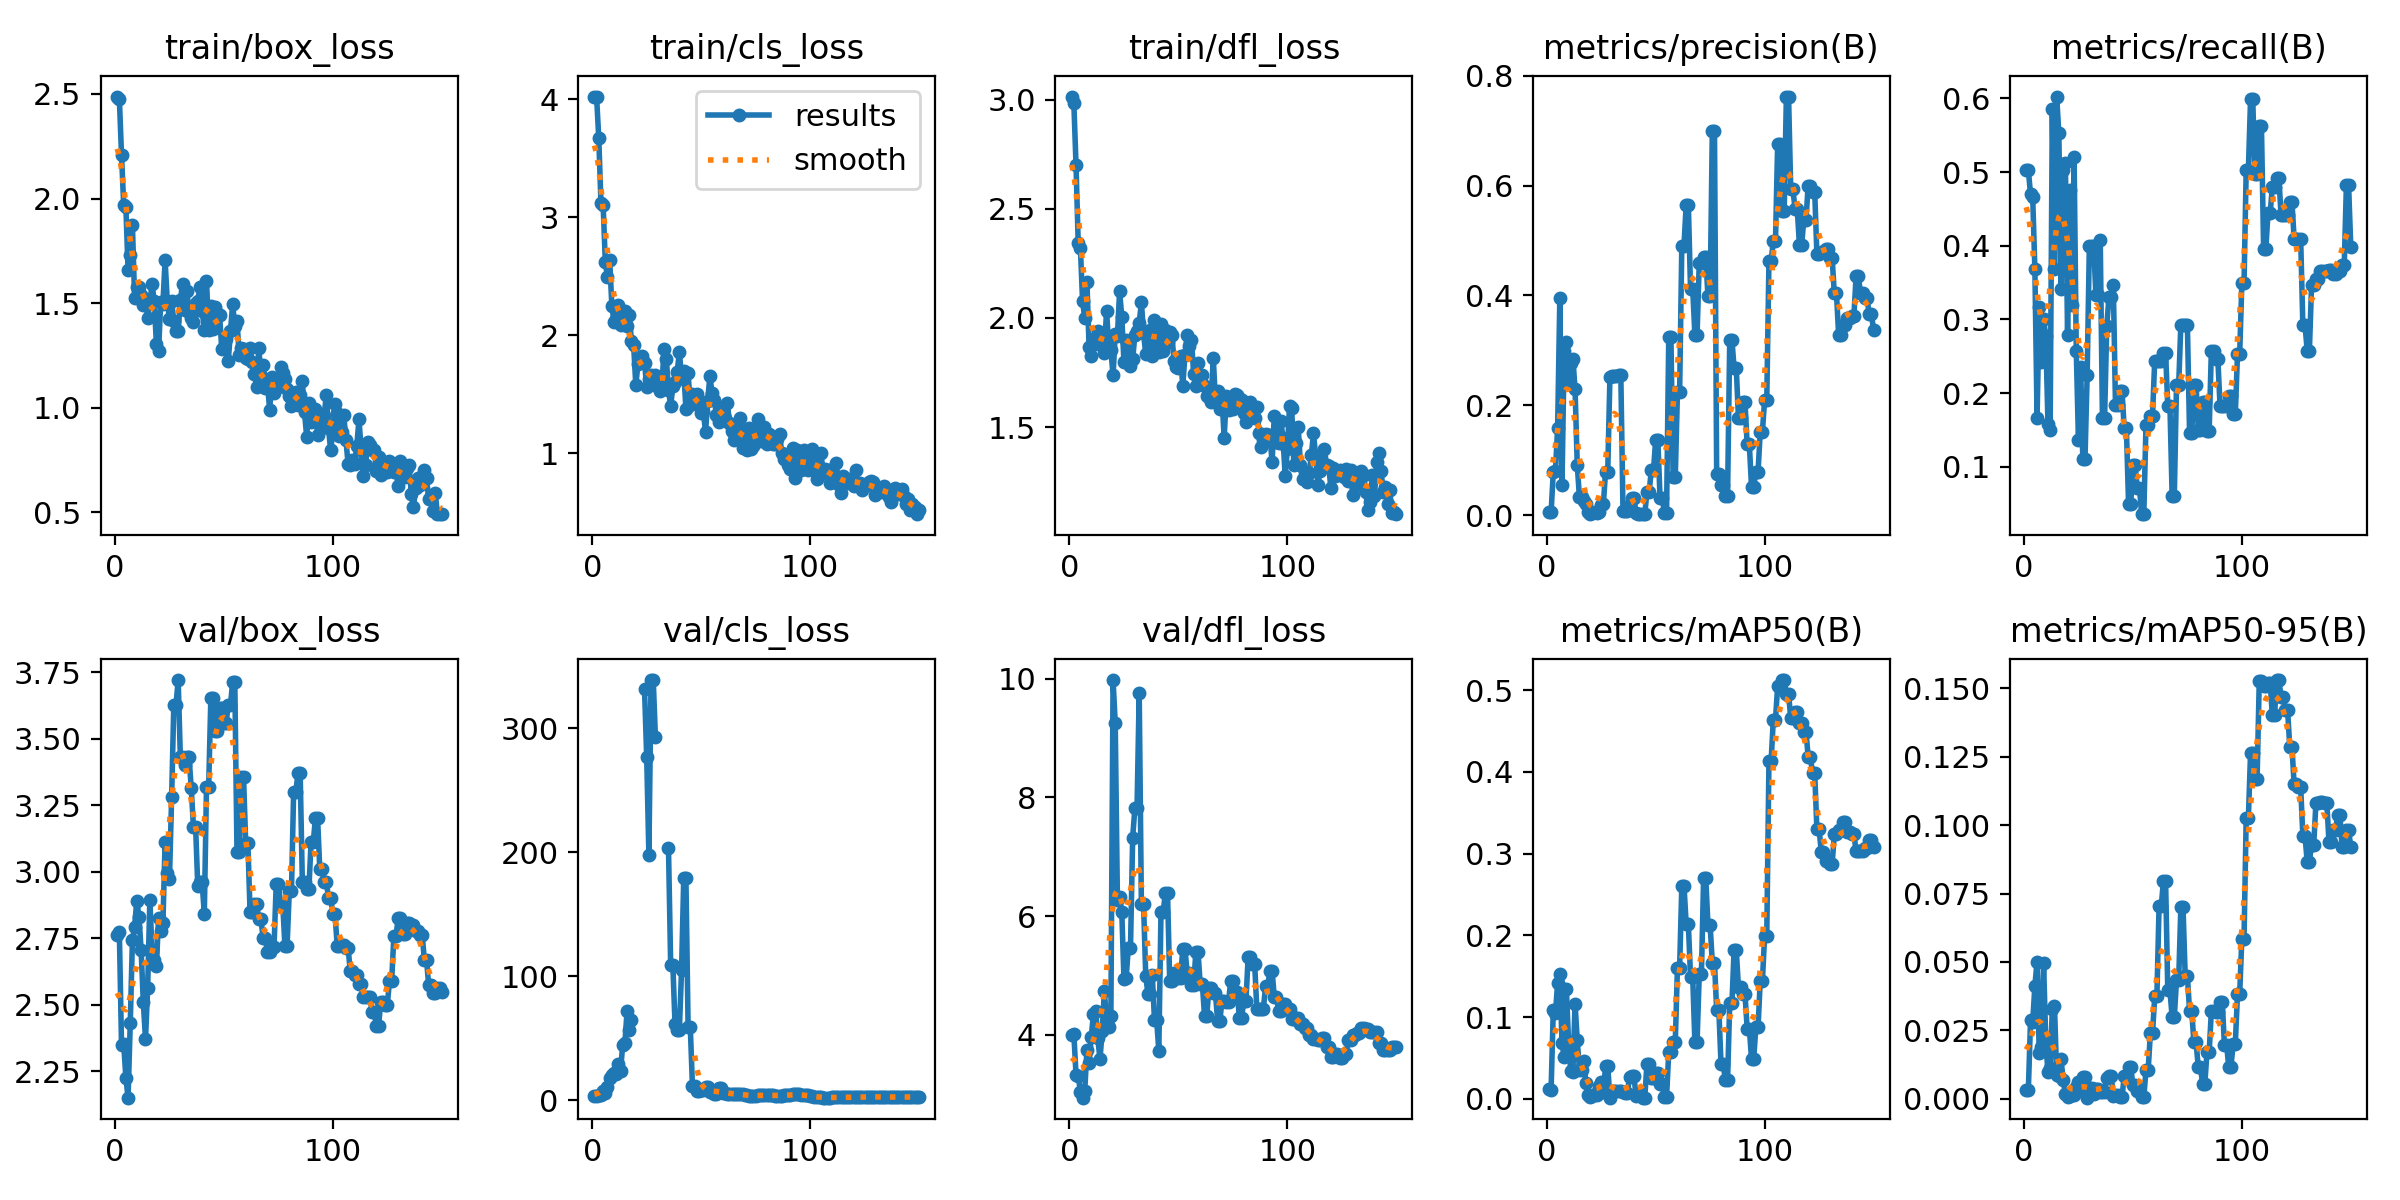

In [13]:
Image(filename='runs/detect/train3/results.png', width=600)

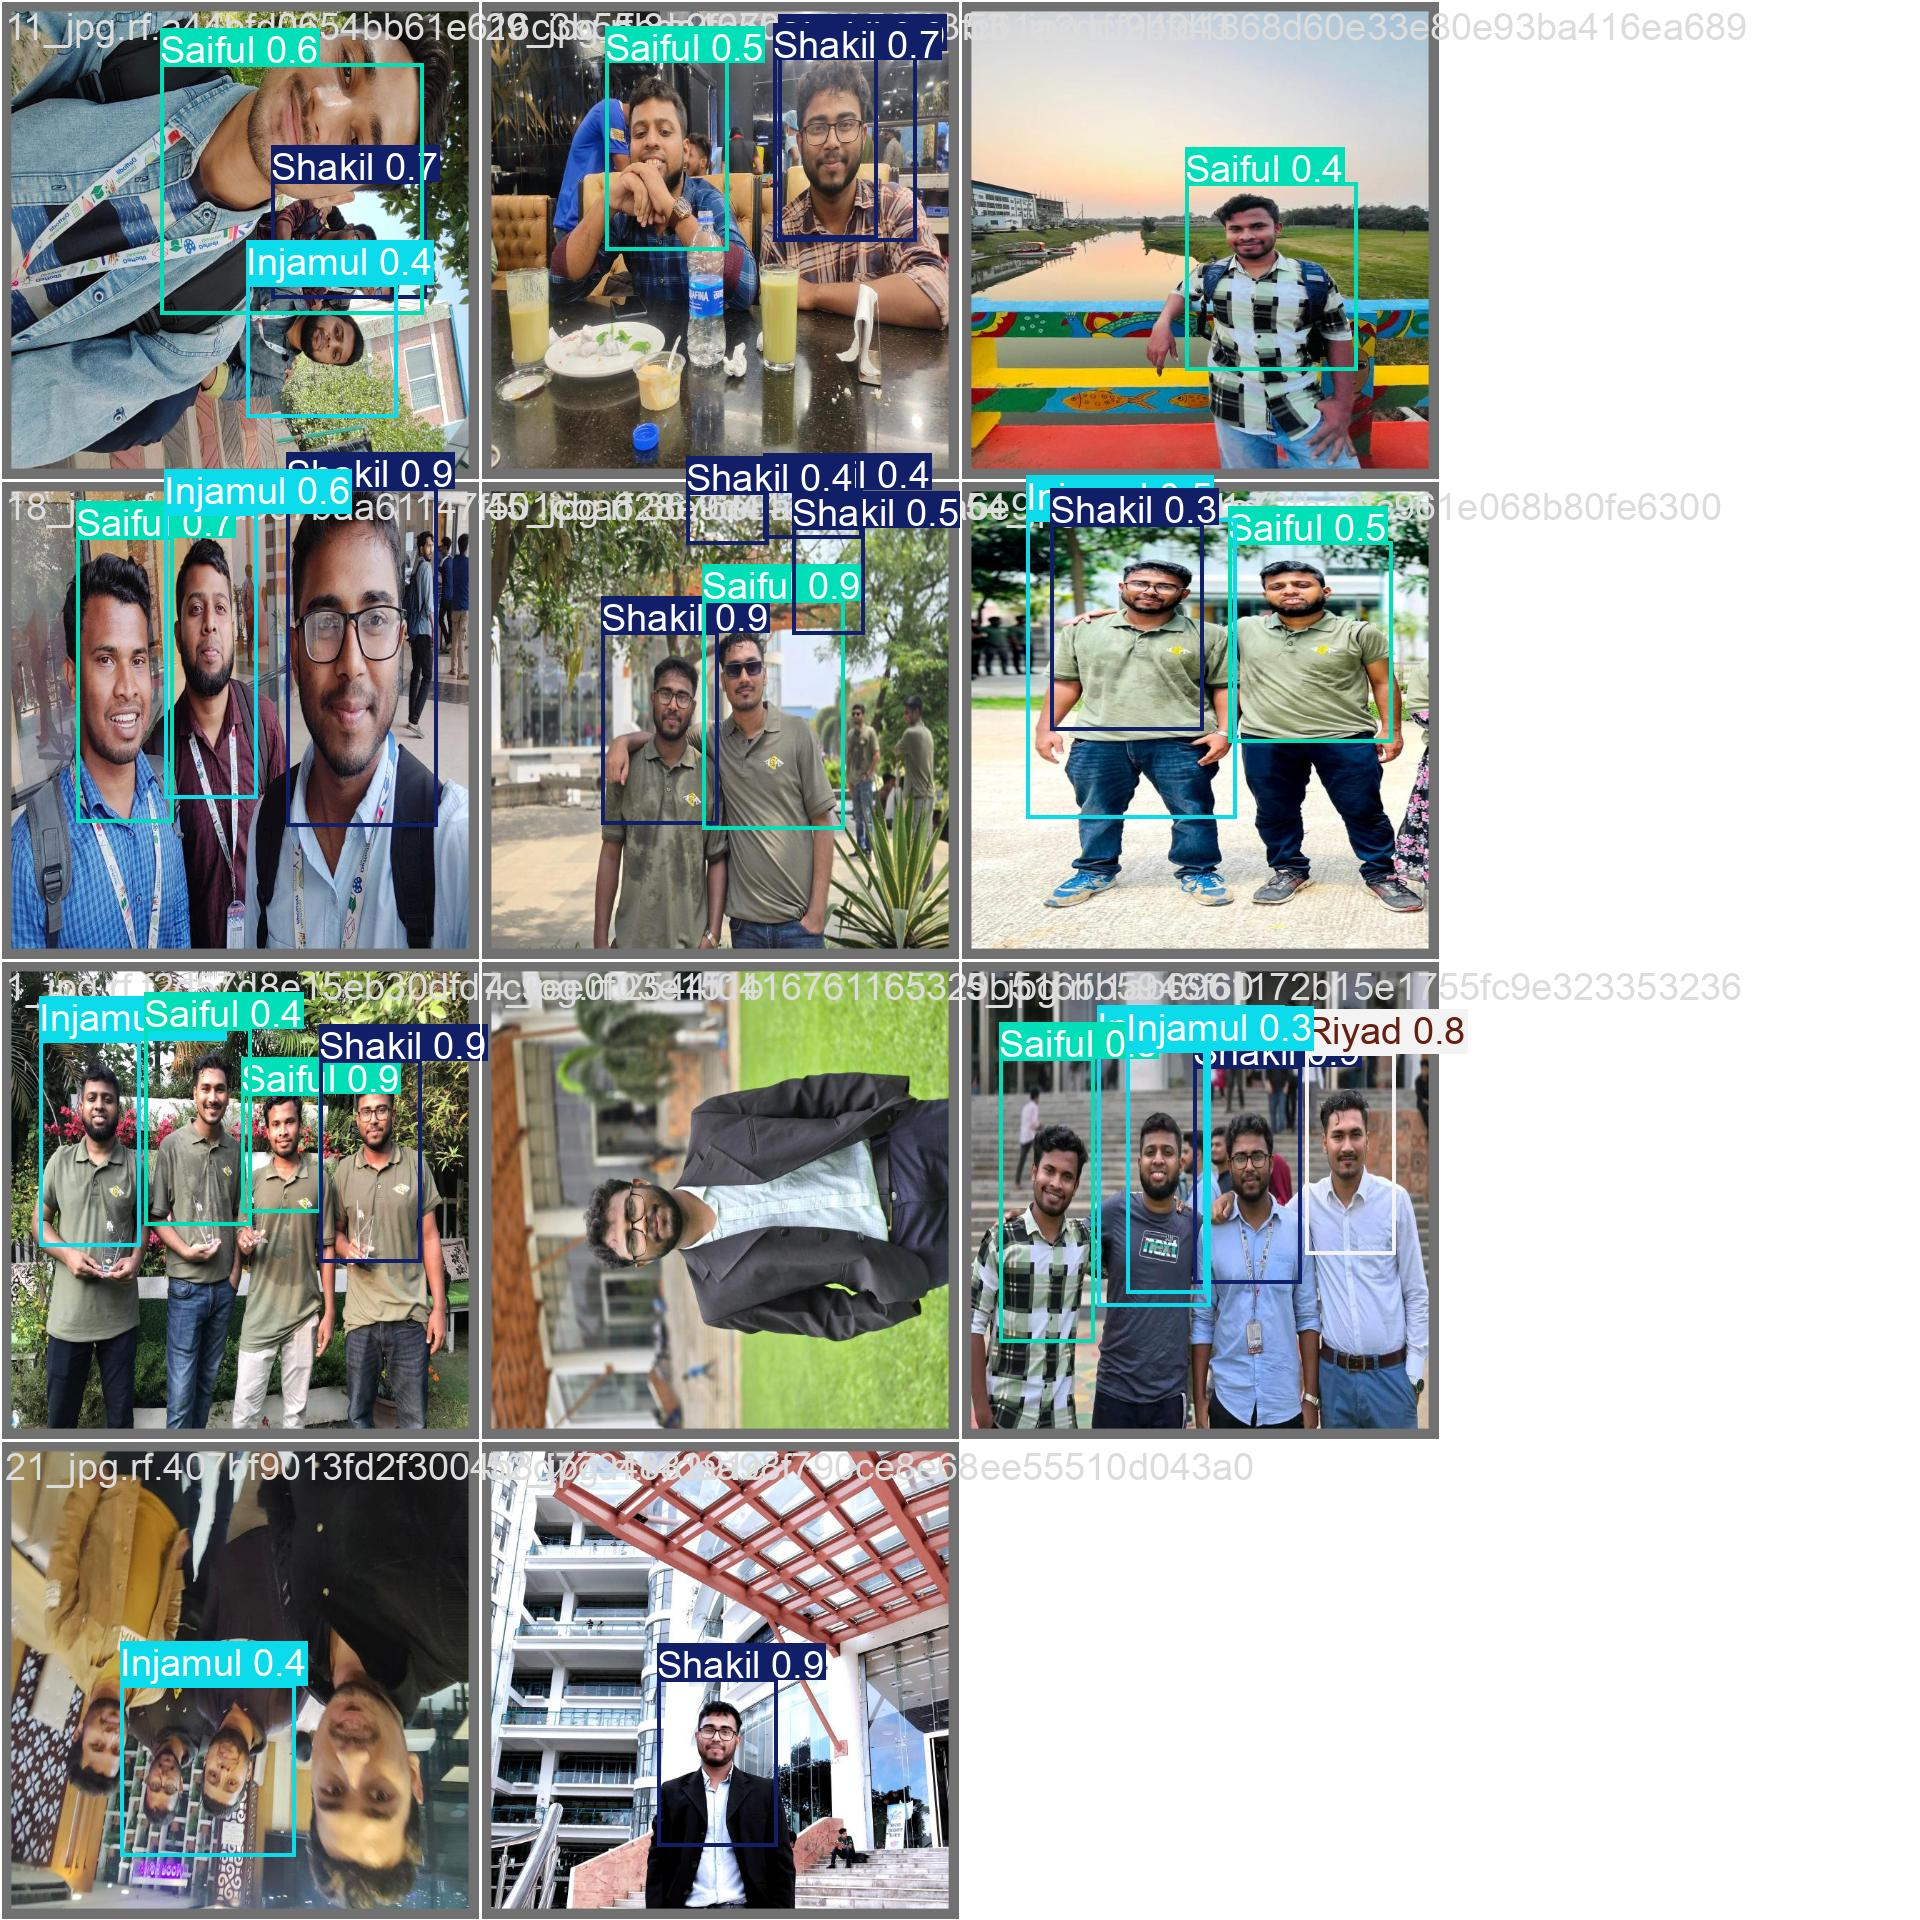

In [14]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source='Friends Detection.v1i.yolov8/test/images'


Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 68,128,383 parameters, 0 gradients, 257.4 GFLOPs

image 1/6 /content/drive/MyDrive/Jupyter Notebook Research Code/Object Detection/Friends Detection.v1i.yolov8/test/images/23_jpg.rf.c19f60a3e9c1acc7b3d16caad393640a.jpg: 640x640 2 Injamuls, 1 Riyad, 1 Shakil, 9295.1ms
image 2/6 /content/drive/MyDrive/Jupyter Notebook Research Code/Object Detection/Friends Detection.v1i.yolov8/test/images/34_jpg.rf.9df88d24e5a180727c8fbe2409036b03.jpg: 640x640 3 Injamuls, 4711.7ms
image 3/6 /content/drive/MyDrive/Jupyter Notebook Research Code/Object Detection/Friends Detection.v1i.yolov8/test/images/37_jpg.rf.3f65966ed43bdb33924e46ddc53c4ced.jpg: 640x640 2 Injamuls, 2 Saifuls, 1 Shakil, 6495.5ms
image 4/6 /content/drive/MyDrive/Jupyter Notebook Research Code/Object Detection/Friends Detection.v1i.yolov8/test/images/3_jpg.rf.ca905208552bd486853d61406f9d6ade.jpg: 640x640 3 Injamuls, 1 Riy

## Inference with Custom Model

**NOTE:** Let's take a look at few results.

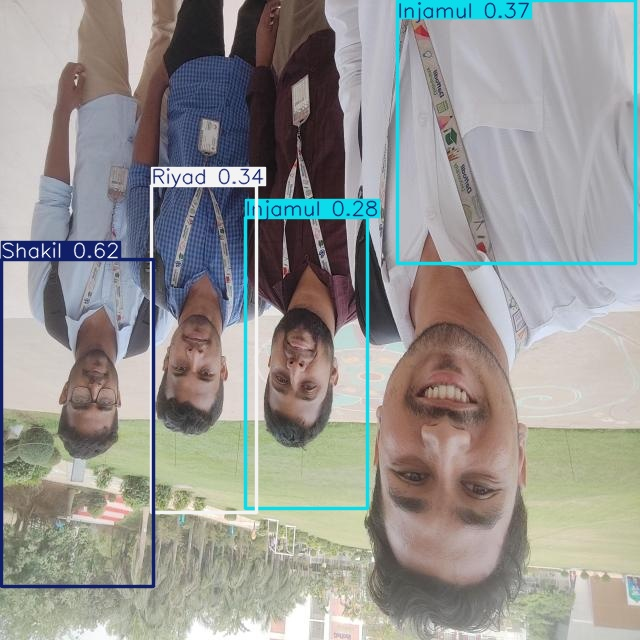

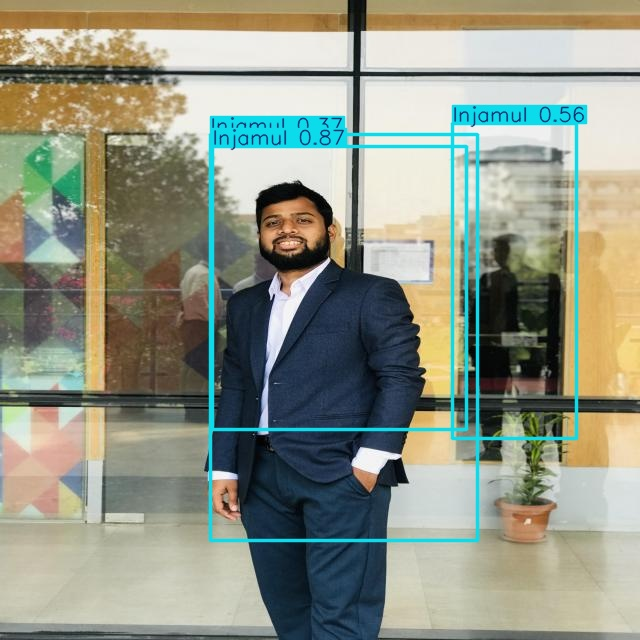

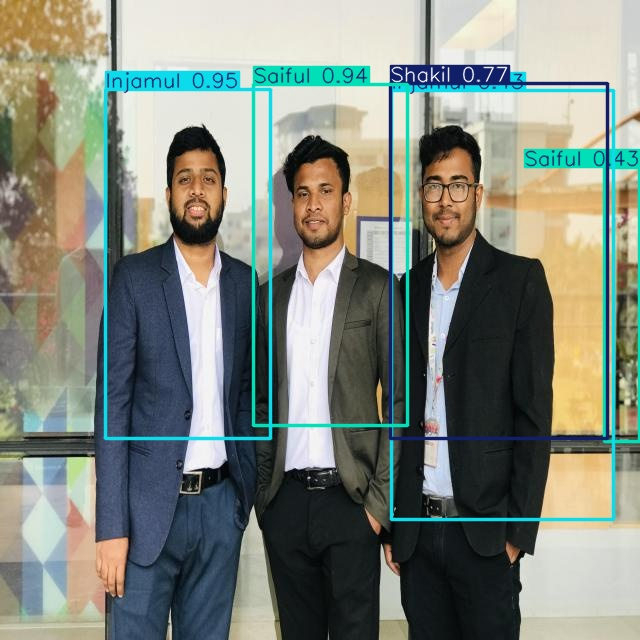

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")